In [ ]:
from IPython.display import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd

### **Keras Applications**

Ver más: https://keras.io/api/applications/

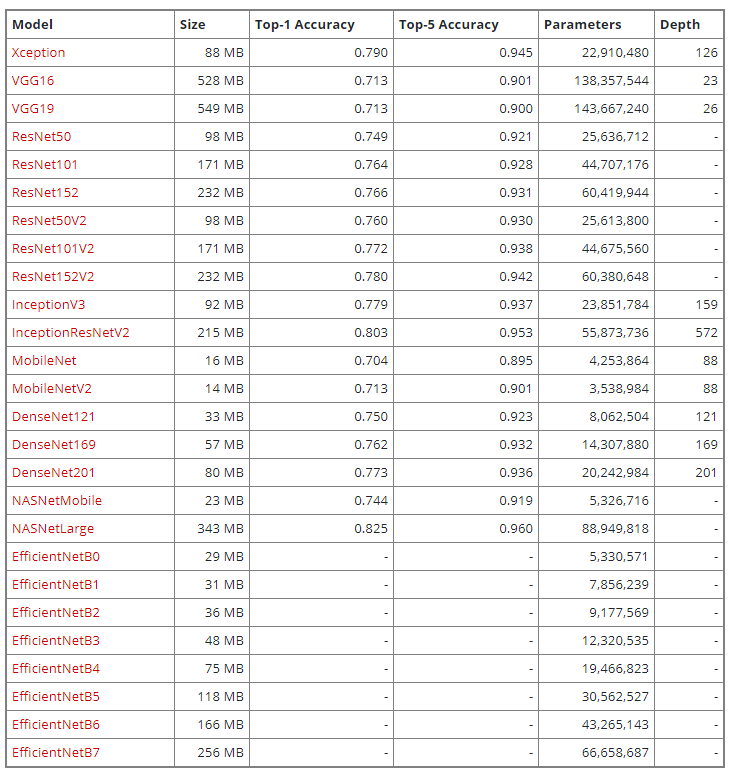

In [ ]:
#@title Cargar modelo pre-entrenado 🤖  { run: "auto" }
model_name = "DenseNet121" #@param ["VGG16", "ResNet50", "VGG19", "InceptionV3", "DenseNet121", "NASNetLarge"]
if model_name == "ResNet50":
  from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
  model = ResNet50(weights='imagenet')
  target_size=(224, 224)
if model_name == "VGG16":
  from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions
  model = VGG16(weights='imagenet')
  target_size=(224, 224)
if model_name == "VGG19":
  from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input, decode_predictions
  model = VGG19(weights='imagenet')
  target_size=(224, 224)
if model_name == "InceptionV3":
  from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
  model = InceptionV3(weights='imagenet')
  target_size=(299, 299)
if model_name == "DenseNet121":
  from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input, decode_predictions
  model = DenseNet121(weights='imagenet')
  target_size=(224, 224)
if model_name == "NASNetLarge":
  from tensorflow.keras.applications.nasnet import NASNetLarge, preprocess_input, decode_predictions
  model = NASNetLarge(weights='imagenet')
  target_size=(331, 331)
print("Modelo cargado: {}".format(model.name))

### **Mostrar Modelo**

In [ ]:
plot_model(model)

In [ ]:
model.summary()

### **Cargar imagen de prueba 🐘🖼️**

In [ ]:
!wget -O image.jpg 'https://www.purina-latam.com/sites/g/files/auxxlc391/files/styles/social_share_large/public/Purina%C2%AE%20caracteristicas%20de%20los%20pugs.jpg?itok=V_XrYHWV'
img_path = 'image.jpg'
display(Image(img_path))

In [ ]:
img = image.load_img(img_path, target_size=target_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
pd.DataFrame(decode_predictions(preds, top=10)[0]).iloc[:,1:]

### **Capturar Imagen de Prueba 📷**



In [ ]:
#@title Helper - capturar webcam
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

img = image.load_img(filename, target_size=target_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
pd.DataFrame(decode_predictions(preds, top=10)[0]).iloc[:,1:]